# Klasifikasi Dataset Fashion-MNIST dengan Convolution Neural Network (CNN)

Oleh: Muhamamd Hilmi Hafid & Amnaduny Akhara (ML-B)

Fashion-MNIST merupakan dataset yang berisi data gambar beberapa jenis pakaian. Dataset ini berisi 55.000 data latih, 5.000 data validasi, dan 10.000 data uji. Setiap data merupakan gambar hitam putih dengan ukuran 28 x 28 pixel yang terbagi ke dalam 10 label kelas.

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTlzcYWSGorzWRVBEg5-5WbSrJqxBwzRLhrMNGM804qOYhIptv9)

Sebelum klasifikasi dilakukan, pertama perlu memanggil *libary* python yang umum digunakan dengan perintah `import`. Kita akan menggunakan *framework* Tensorflow dan Keras untuk merancang CNN, serta *library* pendukung lainnya, seperti Numpy, Matplotlib, dan lain-lain.



In [1]:
import keras
import keras.backend as k
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings
import datetime
import time
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## Unduh Dataset

Terlebih dahulu buat folder untuk penyimpanan dataset dengan perintah `!mkdir` (*make directory*). Lalu unduh dataset dengan perintah `!wget` yang kemudian akan disimpan di dalam folder yang telah dibuat.

In [2]:
!mkdir -p data/fashion
!wget -O data/fashion/train-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -O data/fashion/train-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -O data/fashion/t10k-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -O data/fashion/t10k-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

--2019-11-10 22:05:06--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.198
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.72.198|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘data/fashion/train-images-idx3-ubyte.gz’

data/fashion/train- 100%[===================>]  25.20M  6.54MB/s    in 3.9s    

2019-11-10 22:05:10 (6.54 MB/s) - ‘data/fashion/train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2019-11-10 22:05:11--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.74.106
Connecting to fashion-mnist.s3

### Praproses Data

Import modul `input_data` dari Tensorflow untuk mengekstrak dan membaca data yang ada pada folder dataset.

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
fashion_mnist = input_data.read_data_sets('data/fashion')

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


Memuat data latih, data uji, dan data validasi yang ada pada dataset Fashion-MNIST.

In [0]:
train = fashion_mnist.train
test = fashion_mnist.test
val = fashion_mnist.validation

In [0]:
train_images = train.images
train_labels = train.labels

test_images = test.images
test_labels = test.labels

val_images = val.images
val_labels = val.labels

Setiap gambar memiliki kelas masing-masing. Karena nama kelas tidak termasuk dalam dataset, perlu dibuat array nama kelas yang akan digunakan di tahap selanjutnya.

In [0]:
types = [
  'T_shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle Boot'        
]

Melusuri format dataset sebelum melatih model. Berikut ini menunjukkan ada 55.000 gambar pada data latih, 10.000 gambar pada data uji, dan 5.000 gambar pada data validasi.

In [9]:
print("Train Images:", train_images.shape)
print("Train Labels:", train_labels.shape)
print()
print("Test Images:" , test_images.shape)
print("Test Labels:", test_labels.shape)
print()
print("Validation Images:" , val_images.shape)
print("Validation Labels:", val_labels.shape)

Train Images: (55000, 784)
Train Labels: (55000,)

Test Images: (10000, 784)
Test Labels: (10000,)

Validation Images: (5000, 784)
Validation Labels: (5000,)


Selanjutnya visualisasi dilakukan untuk mengetahui isi data. Berikut ini sebanyak 25 sampel data latih divisualisasikan secara acak.

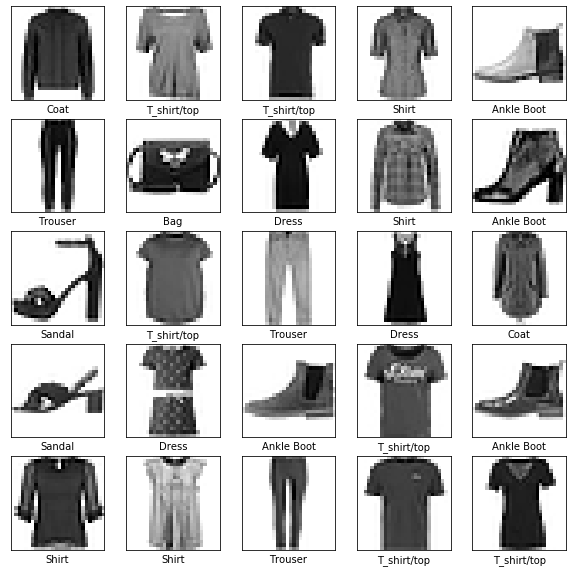

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    rand_image = np.random.randint(0, train_labels.shape[0])
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[rand_image].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(types[train_labels[rand_image]])
plt.show()

## Pelatihan dan Pengujian

Penamaan data dengan mengganti variabel seperti yang umumnya digunakan, menjadi X_train, y_train, X_test, y_test, X_val, y_val. Penamaan ini dilakukan untuk memudahkan proses pelatihan dan pengujian, meskipun sifatnya hanya opsional.

Karena *convolutional layer* membutukan matrix data dengan format 4D, data yang awalnya 3D kemudian diubah menjadi 4D dengan perintah reshape.

Sebelum dimasukkan ke model CNN, setiap data gambar dibagi dengan 255 (nilai piksel gambar yang berkisar dari 0 hingga 255) agar nilai data berkisar di antara 0 hingga 1. Hal ini dilakukan untuk memudahkan dan mempercepat pengolahan data.


In [0]:
X_train, y_train = train_images, train_labels
X_test, y_test = test_images, test_labels
X_val, y_val = val_images, val_labels

if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
    X_val = X_val.reshape(X_val.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_test /= 255
X_val /= 255

Cek kembali dimensi data dengan perintah `shape` untuk memastikan data telah sesuai dengan format yang dibutuhkan.

In [12]:
print("Train Images:", X_train.shape)
print("Train Labels:", y_train.shape)
print()
print("Test Images:" , X_test.shape)
print("Test Labels:", y_test.shape)
print()
print("Validation Images:" , X_val.shape)
print("Validation Labels:", y_val.shape)

Train Images: (55000, 28, 28, 1)
Train Labels: (55000,)

Test Images: (10000, 28, 28, 1)
Test Labels: (10000,)

Validation Images: (5000, 28, 28, 1)
Validation Labels: (5000,)


Sebelum membuat model arsitektur CNN, import terlebih dahulu modul-modul yang dibutuhkan dari library Keras.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D,MaxPool2D
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau

Selanjutnya yaitu membuat arsitektur model CNN dengan memasukkan beberapa parameter. Kemudian model dicompile dengan parameter *loss* yaitu `categorical_crosentropy` dan parameter *optimizer* yaitu `Nadam()`. Parameter tersebut merupakan parameter yang umumnya digunakan dalam kasus klasifikasi.

In [0]:
class CNN():
  def __init__(self, inputshape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Nadam(), metrics=['accuracy'])
    self.model = model     
  def getModel(self):
    return self.model

Berikut merupakan detail arsitektur model CNN yang telah dibuat sebelumnya. Layer yang terbentuk ada 8 layer dengan total parameter sebanyak 1.199.882.

In [15]:
CNN = CNN(input_shape)
CNN.getModel().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

Karena parameter loss yang digunakan yaitu `categorical_crossentropy`, maka data label perlu dikonversi atau di-*encode* terlebih dahulu menjadi tipe kategorik/nominal dari yang sebelumnya bertipe array numerik.

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_val = np_utils.to_categorical(y_val, 10)

Selanjutnya pelatihan model CNN yang telah dibuat dengan iterasi sebanyak 40. Dari hasil yang diperoleh, akurasi pelatihan terbaik yaitu 90.56% dengan nilai loss yaitu 0.263. Adapun waktu pelatihan yang terpakai yaitu selama 1 jam 35 menit.

In [17]:
start = datetime.datetime.now()

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
history = CNN.getModel().fit(X_train, y_train, epochs=40, validation_data=(X_val,y_val), verbose=1, batch_size=128, callbacks=[learning_rate_reduction])

CNN.getModel().save_weights('best_weights.h5')

(eval_loss, eval_accuracy) = CNN.getModel().evaluate(X_val, y_val, batch_size=128, verbose=1)

print("Accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("Loss: {}".format(eval_loss)) 

end = datetime.datetime.now()
elapsed= end-start

print ("Time: ", elapsed)

Train on 55000 samples, validate on 5000 samples
Epoch 1/40
55000/55000 [==============================] - 141s 3ms/step - loss: 1.0276 - acc: 0.6139 - val_loss: 0.5934 - val_acc: 0.7760
Epoch 2/40
55000/55000 [==============================] - 141s 3ms/step - loss: 0.6790 - acc: 0.7438 - val_loss: 0.5316 - val_acc: 0.8066
Epoch 3/40
55000/55000 [==============================] - 142s 3ms/step - loss: 0.6385 - acc: 0.7593 - val_loss: 0.5059 - val_acc: 0.8202
Epoch 4/40
55000/55000 [==============================] - 147s 3ms/step - loss: 0.6117 - acc: 0.7696 - val_loss: 0.4845 - val_acc: 0.8240
Epoch 5/40
55000/55000 [==============================] - 145s 3ms/step - loss: 0.5968 - acc: 0.7773 - val_loss: 0.4828 - val_acc: 0.8216
Epoch 6/40
55000/55000 [==============================] - 142s 3ms/step - loss: 0.5798 - acc: 0.7838 - val_loss: 0.4570 - val_acc: 0.8406
Epoch 7/40
55000/55000 [==============================] - 142s 3ms/step - loss: 0.5621 - acc: 0.7898 - val_loss: 0.4427 - v

Berikut merupakan visualiasi grafik hasil akurasi dan loss yang diperoleh dari hasil pelatihan dengan iterasi sebanyak 40. Semakin dekat garis akurasi dan loss maka semakin baik hasilnya, sehingga apabila kedua garis bersinggungan, maka itulah akurasi dan loss yang terbaik.

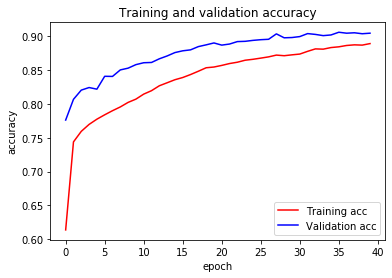

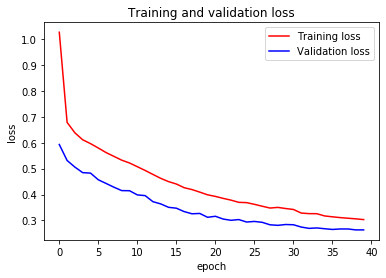

In [18]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(acc))
#Traini and validation accuracy
plt.plot(epochs, acc, 'r', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and validation accuracy")
plt.ylabel("accuracy") 
plt.xlabel("epoch")
plt.legend()
plt.show()
#Traini and validation loss
plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()
plt.show()

Selanjutnya yaitu pengujian dengan menggunakan data uji. Untuk mengetahui hasilnya, maka dibandingkan antara label output hasil prediksi, dengan label data uji yang digunakan.

In [0]:
y_pred = CNN.getModel().predict(X_test)

In [20]:
np.argmax(y_pred[5])

1

In [21]:
np.argmax(y_test[5])

1

### Evaluasi

Evaluasi perlu dilakukan untuk mengetahui performa dari model CNN yang digunakan. Evaluasi dilakukan dengan menghitung *accuracy*, *precision*, *recall*, dan *f1-score* menggunakan *libary* Scikit-Learn. Keempat variabel tersebut dihitung berdasarkan *confusion matrix* yang diperoleh. Berikut hasil dari evaluasi model CNN yang digunakan:

In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [23]:
accuracy = metrics.accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
confusion_matrix = metrics.confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
classification = metrics.classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=types)
print ("Model accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()

Model accuracy:
 0.8992

Confusion matrix:
 [[884   0  13  25   3   1  67   0   7   0]
 [  1 972   0  18   3   0   4   0   2   0]
 [ 17   0 834   9  78   0  59   0   3   0]
 [ 20   4  12 911  27   0  22   0   4   0]
 [  1   1  57  31 860   0  49   0   1   0]
 [  0   0   0   1   0 974   0  20   0   5]
 [156   2  84  25  76   0 648   0   9   0]
 [  0   0   0   0   0   7   0 973   1  19]
 [  3   1   4   1   2   1   6   3 979   0]
 [  0   0   0   0   0   3   1  39   0 957]]

Classification report:
               precision    recall  f1-score   support

 T_shirt/top       0.82      0.88      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.83      0.83      0.83      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.82      0.86      0.84      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.76      0.65      0.70      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag 

## Visualisasi

Tahap terakhir yaitu visualisasi yang bertujuan untuk memudahkan dalam melihat dan memahami hasil prediksi. Dari hasil yang didapatkan, model CNN yang digunakan memiliki performa yang cukup baik dalam klasifikasi jenis-jenis pakaian, hanya saja masih sedikit kesulitan dalam membedakan antara sendal dan sepatu.

In [0]:
def plot_image(i, predictions, true, img):
  predictions, true, img = predictions, true[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions)
  true_label = np.argmax(true)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(types[predicted_label], 100 * np.max(predictions), types[true_label]), color=color)
  #plt.xlabel("{:2.0f}% {:2.0f}% {:2.0f}".format(100 * np.max(predictions), 100 * np.max(predictions), 100 * np.max(predictions)), color=color)

def plot_value_array(i, predictions, true):
  predictions, true = predictions, true[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions)
  true_label = np.argmax(true)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

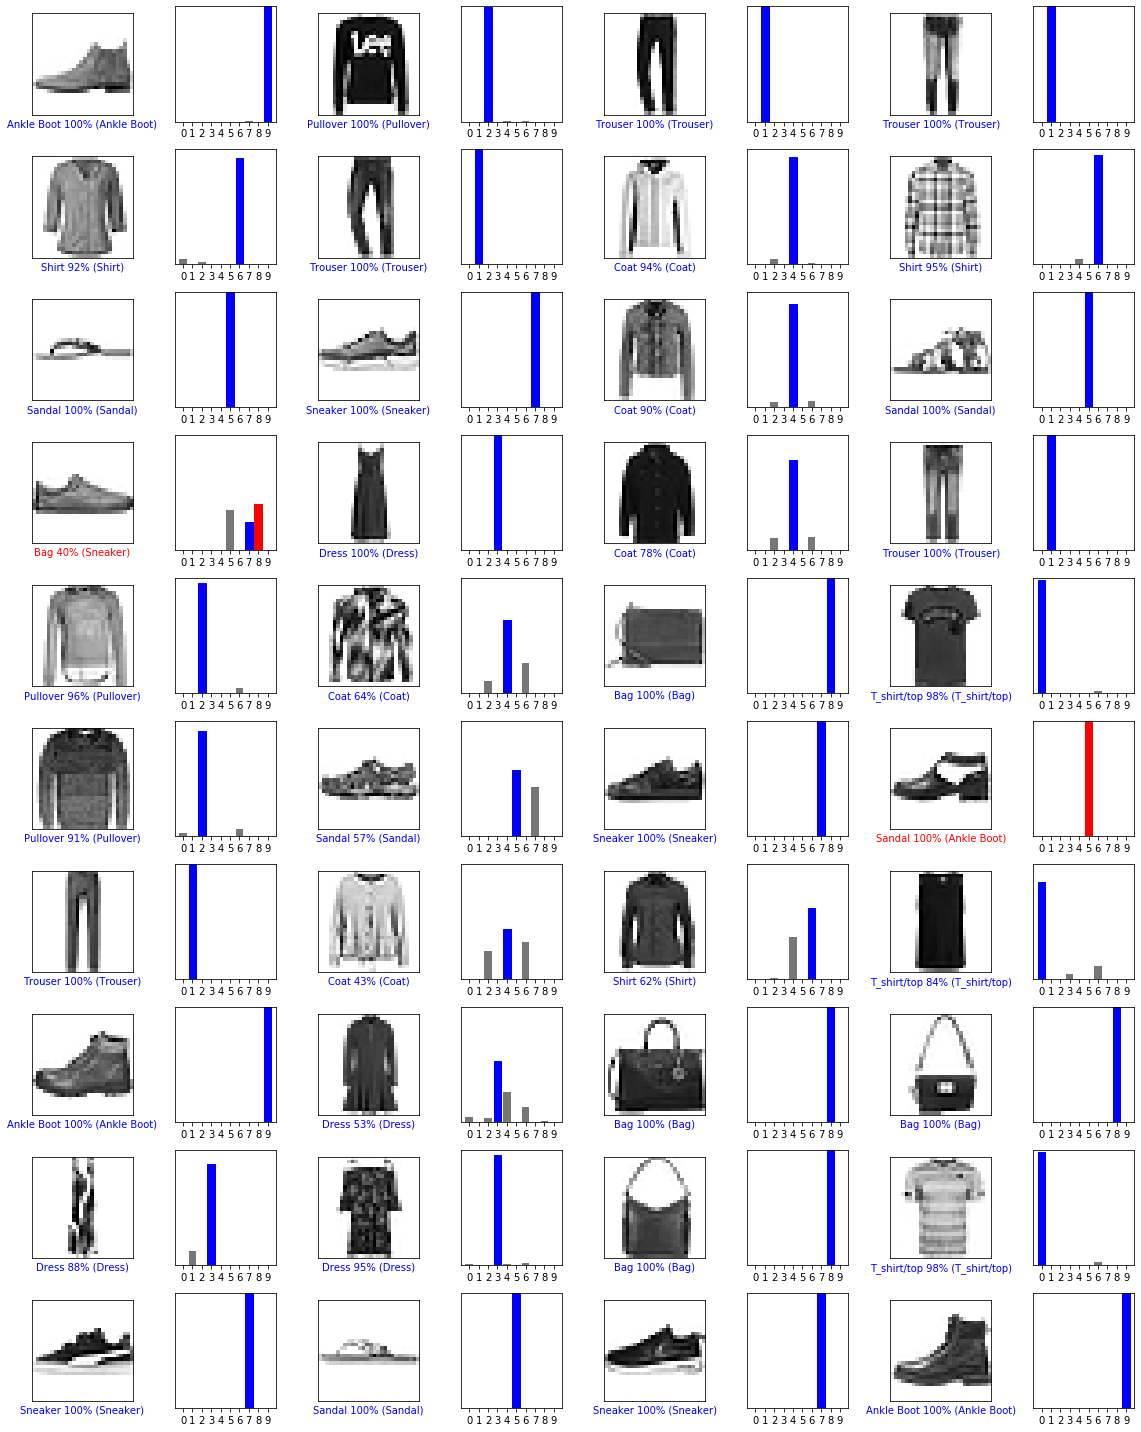

In [26]:
num_rows = 10
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_pred[i], y_test, np.squeeze(X_test))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_pred[i], y_test)
plt.tight_layout()
plt.show()